### **Problem 2 | Regression**

Given California Houses prices data. This data contains information from the 1990 California census., it
does provide an accessible introductory dataset the basics of regression models.
The data pertains to the houses found in each California district and some summary stats about them
based on the 1990 census data.

### **Objective:**
- Predict **median house value** using regression and comparing the performance of various models.


1. 70% training : 15% validation : 15% testing
2. apply linear, lasso(L1), ridge(L2)
3. MSE, MAE

## **1. Preprocessing**

### **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tabulate import tabulate

### **Read Data**

In [24]:
df = pd.read_csv("California_Houses.csv")
print(df.head())
print(df.columns)

   Median_House_Value  Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  \
0            452600.0         8.3252          41        880           129   
1            358500.0         8.3014          21       7099          1106   
2            352100.0         7.2574          52       1467           190   
3            341300.0         5.6431          52       1274           235   
4            342200.0         3.8462          52       1627           280   

   Population  Households  Latitude  Longitude  Distance_to_coast  \
0         322         126     37.88    -122.23        9263.040773   
1        2401        1138     37.86    -122.22       10225.733072   
2         496         177     37.85    -122.24        8259.085109   
3         558         219     37.85    -122.25        7768.086571   
4         565         259     37.85    -122.25        7768.086571   

   Distance_to_LA  Distance_to_SanDiego  Distance_to_SanJose  \
0   556529.158342         735501.806984         67432.5170

### **Data Clean**

In [6]:
df.isnull().sum()

Median_House_Value          0
Median_Income               0
Median_Age                  0
Tot_Rooms                   0
Tot_Bedrooms                0
Population                  0
Households                  0
Latitude                    0
Longitude                   0
Distance_to_coast           0
Distance_to_LA              0
Distance_to_SanDiego        0
Distance_to_SanJose         0
Distance_to_SanFrancisco    0
dtype: int64

In [7]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Length: 20640, dtype: bool

### By checking the null values and duplicates we conclude that the data is cleaned

### **Analyze Data**



array([[<AxesSubplot: title={'center': 'Median_House_Value'}>,
        <AxesSubplot: title={'center': 'Median_Income'}>,
        <AxesSubplot: title={'center': 'Median_Age'}>,
        <AxesSubplot: title={'center': 'Tot_Rooms'}>],
       [<AxesSubplot: title={'center': 'Tot_Bedrooms'}>,
        <AxesSubplot: title={'center': 'Population'}>,
        <AxesSubplot: title={'center': 'Households'}>,
        <AxesSubplot: title={'center': 'Latitude'}>],
       [<AxesSubplot: title={'center': 'Longitude'}>,
        <AxesSubplot: title={'center': 'Distance_to_coast'}>,
        <AxesSubplot: title={'center': 'Distance_to_LA'}>,
        <AxesSubplot: title={'center': 'Distance_to_SanDiego'}>],
       [<AxesSubplot: title={'center': 'Distance_to_SanJose'}>,
        <AxesSubplot: title={'center': 'Distance_to_SanFrancisco'}>,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

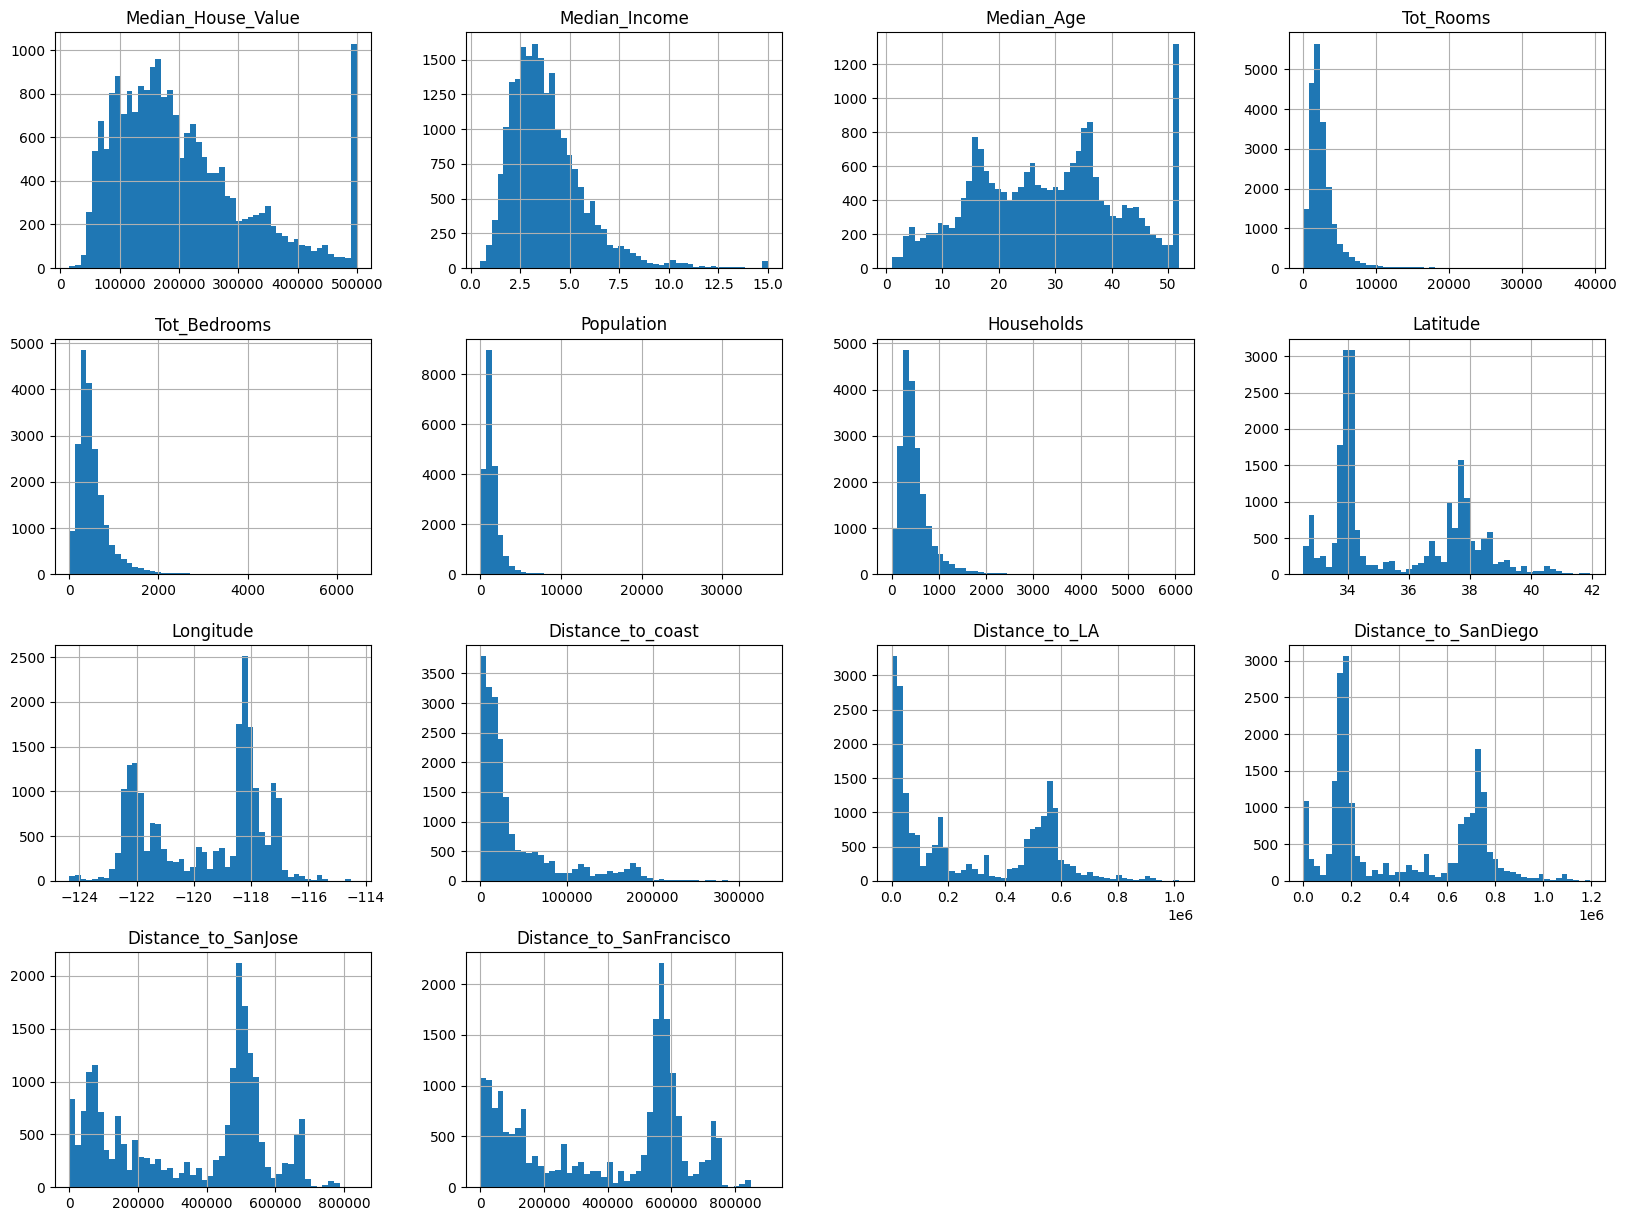

In [8]:
df.hist(bins=50, figsize=(20,15))

### **Adjust Data for Splitting**

In [25]:
X = df.drop('Median_House_Value', axis=1)
y = df['Median_House_Value']

print(f"X shape: {X.shape}, y shape: {y.shape}")

X shape: (20640, 13), y shape: (20640,)


In [26]:
X_tv, X_test, y_tv, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_tv, y_tv, test_size=0.1765, random_state=42)

### **Function for Plotting**

In [31]:
def plot_model(name, y_pred):
  plt.figure(figsize=(8, 6))
  plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
  plt.xlabel('Actual Median House Value')
  plt.ylabel('Predicted Median House Value')
  plt.title('Actual vs Predicted Values')
  plt.title(f'{name} - True vs Predicted Values')
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
  plt.show()

-------------------------------------------------------

## **1. Linear Regression**

- Approach 1: Using all given features + no scaling

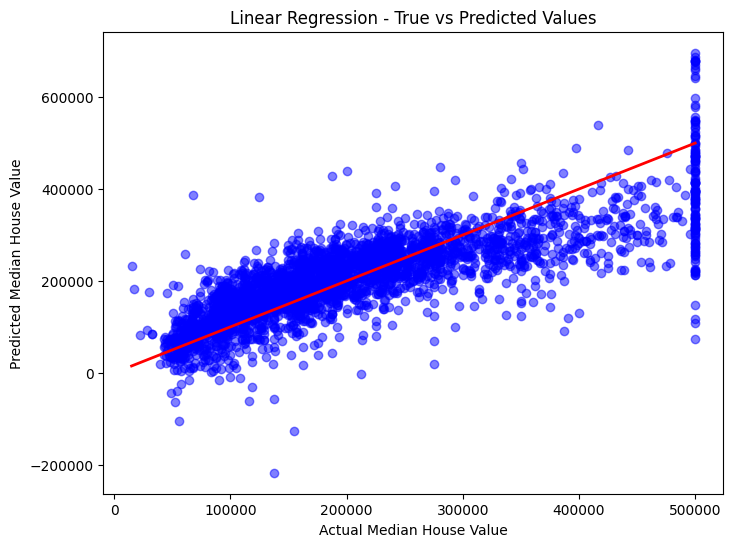

In [12]:
linear_reg_ = LinearRegression()
linear_reg_.fit(X_train, y_train)

y_pred_linear = linear_reg_.predict(X_test)
plot_model('Linear Regression', y_pred_linear)

In [ ]:
mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)

print(f"Mean Squared Error (MSE): {mse_linear}")
print(f"Mean Absolute Error (MAE): {mae_linear}")

Mean Squared Error (MSE): 4857042102.162979
Mean Absolute Error (MAE): 50744.913627747155


-----------------------------------------

## **2. Lasso Regression**

In [61]:
lasso = Lasso(alpha=1.0) # initialize alpha with any value then find the value which gives less mse
lasso.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.394e+13, tolerance: 1.928e+10
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [62]:
# alpha_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
alpha_values = np.logspace(-4, 4, 50)

best_alpha = None
best_mse = float("inf")

for alpha in alpha_values:
    # Train with the current alpha
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)

    # Predict on the validation set and calculate MSE
    y_pred = lasso.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)

    # Track best alpha based on validation MSE
    if mse < best_mse:
        best_mse = mse
        best_alpha = alpha

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.394e+13, tolerance: 1.928e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.394e+13, tolerance: 1.928e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.394e+13, tolerance: 1.928e

Best alpha found: 0.0001


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.808e+13, tolerance: 1.928e+10
  model = cd_fast.enet_coordinate_descent(


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.394e+13, tolerance: 1.928e+10
  model = cd_fast.enet_coordinate_descent(


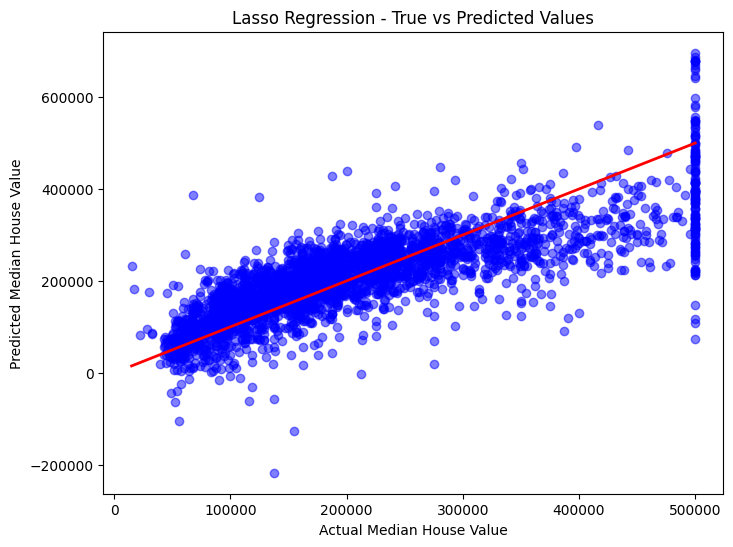

In [66]:
final_lasso = Lasso(alpha=best_alpha)
final_lasso.fit(X_train, y_train)

y_pred_lasso = final_lasso.predict(X_test)
plot_model('Lasso Regression', y_pred_lasso)

In [65]:
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)

print(f"Mean Squared Error (MSE): {mse_lasso}")
print(f"Mean Absolute Error (MAE): {mae_lasso}")

Mean Squared Error (MSE): 4857195357.385447
Mean Absolute Error (MAE): 50746.01625430503


-------------------------------

## **3. Ridge Regression**

In [67]:
ridge = Ridge(alpha=1.0) # initialize alpha with any value then find the value which gives less mse
ridge.fit(X_train, y_train)

Ridge()

In [68]:
alpha_values = np.logspace(-4, 4, 50)

best_alpha = None
best_mse = float("inf")

for alpha in alpha_values:
    # Train with the current alpha
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)

    # Predict on the validation set and calculate MSE
    y_pred = ridge.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)

    # Track best alpha based on validation MSE
    if mse < best_mse:
        best_mse = mse
        best_alpha = alpha

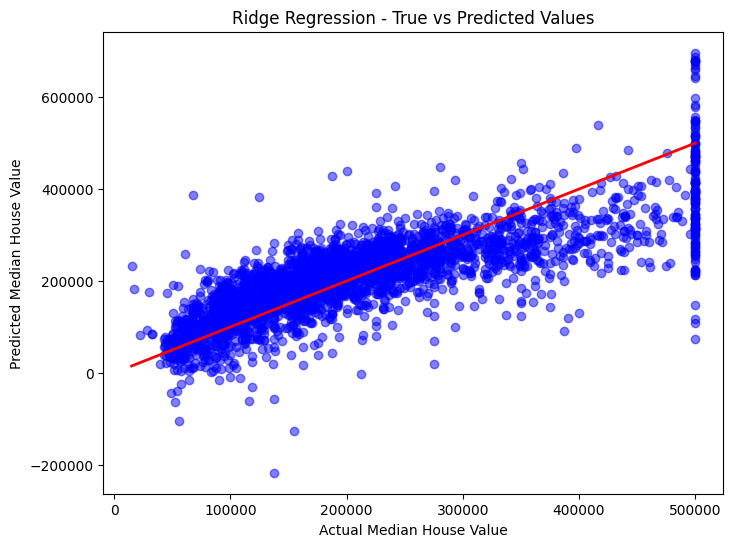

In [69]:
final_ridge = Ridge(alpha=best_alpha)
final_ridge.fit(X_train, y_train)

y_pred_ridge = final_ridge.predict(X_test)
plot_model('Ridge Regression', y_pred_ridge)

In [70]:
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

print(f"Ridge Mean Squared Error (MSE): {mse_ridge}")
print(f"Ridge Mean Absolute Error (MAE): {mae_ridge}")

Ridge Mean Squared Error (MSE): 4857042104.2535715
Ridge Mean Absolute Error (MAE): 50744.91369556299


In [72]:
results=[
    ['Linear Regression', mse_linear, mae_linear],
    ['Lasso Regression', mse_lasso, mae_lasso],
    ['Ridge Regression', mse_ridge, mae_ridge]
]
headers = ["Regression", "Mean Squared Error", "Mean Absolute Error"]
print(tabulate(results, headers=headers, tablefmt="grid"))

+-------------------+----------------------+-----------------------+
| Regression        |   Mean Squared Error |   Mean Absolute Error |
+===================+======================+=======================+
| Linear Regression |          4.85704e+09 |               50744.9 |
+-------------------+----------------------+-----------------------+
| Lasso Regression  |          4.8572e+09  |               50746   |
+-------------------+----------------------+-----------------------+
| Ridge Regression  |          4.85704e+09 |               50744.9 |
+-------------------+----------------------+-----------------------+


----------------------------------------------------

### **Other Approaches Tried**

- **Linear Regression | Dropping some features based on correlation**

In [16]:
correlation_matrix = df.corr()
print(correlation_matrix['Median_House_Value'].sort_values(ascending=False))

Median_House_Value          1.000000
Median_Income               0.688075
Tot_Rooms                   0.134153
Median_Age                  0.105623
Households                  0.065843
Tot_Bedrooms                0.050594
Population                 -0.024650
Distance_to_SanFrancisco   -0.030559
Distance_to_SanJose        -0.041590
Longitude                  -0.045967
Distance_to_SanDiego       -0.092510
Distance_to_LA             -0.130678
Latitude                   -0.144160
Distance_to_coast          -0.469350
Name: Median_House_Value, dtype: float64


In [20]:
X2 = df[['Median_Income', 'Median_Age', 'Tot_Rooms',
       'Tot_Bedrooms', 'Households', 'Latitude',
       'Distance_to_coast', 'Distance_to_LA', 'Distance_to_SanDiego']]
y2 = df['Median_House_Value']

# print(X)
print(f"X2 shape: {X2.shape}, y2 shape: {y2.shape}")

X2 shape: (20640, 9), y2 shape: (20640,)


In [21]:
X2_tv, X2_test, y2_tv, y2_test = train_test_split(X2, y2, test_size=0.15, random_state=42)

X2_train, X2_val, y2_train, y2_val = train_test_split(X2_tv, y2_tv, test_size=0.1765, random_state=42)

print(f"Train size: {len(X2_train)}, Validation size: {len(X2_val)}, Test size: {len(X2_test)}")


Train size: 14447, Validation size: 3097, Test size: 3096


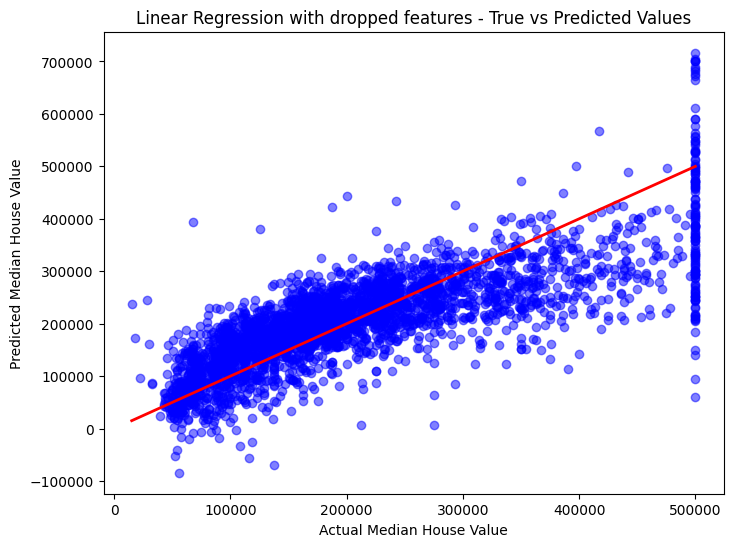

Mean Squared Error (MSE): 5227257228.651695
Mean Absolute Error (MAE): 53042.241036274136


In [22]:
linear_reg2 = LinearRegression()
linear_reg2.fit(X2_train, y2_train)

y2_pred_linear = linear_reg2.predict(X2_test)
plot_model('Linear Regression with dropped features', y2_pred_linear)

mse_linear2 = mean_squared_error(y2_test, y2_pred_linear)
mae_linear2 = mean_absolute_error(y2_test, y2_pred_linear)

print(f"Mean Squared Error (MSE): {mse_linear2}")
print(f"Mean Absolute Error (MAE): {mae_linear2}")

- **Linear Regression | Scaling Data**

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(StandardScaler(), LinearRegression())

pipeline.fit(X_train, y_train)
y_val_predict = pipeline.predict(X_val)

mse_linear_scaled = mean_squared_error(y_test, y_pred_linear)
mae_linear_scaled = mean_absolute_error(y_test, y_pred_linear)

print(f"Mean Squared Error (MSE): {mse_linear_scaled}")
print(f"Mean Absolute Error (MAE): {mae_linear_scaled}")


Mean Squared Error (MSE): 4857042102.162979
Mean Absolute Error (MAE): 50744.913627747155


__________________________


### Conclusion
We tried ifferent regression techniques to predict the median house value in California based on census data. We implemented Linear, Lasso, and Ridge regression models and evaluated their performance using MSE and MAE on the test data.

Calculating the Mean squared error, and mean absolute error: Linear regression and Ridge regression gave the least error values. However the error is still large so we may try different models instead of linear regression

